Create one dataset /download one dataset from kaggle .explain each type of data and analyse the data attributes- its dispersion of values and relationship between attributes using respective chart /graph.

                                            DATASET TAKEN-> Student
                                            
                                            Work done by:-
                                            
                                            1) PRANAY AGARWAL (RA1811003040243)
                                            
                                            2) JATHISWAR BHASKAR (RA1811003040088)
                                            
                                            3) M TUSHAR BANSAL (RA1811003040159)

In [3]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import norm 
import numpy as np

df=pd.read_csv('student.csv')

df.head()  #displaying first five tuples of dataset

,Gender,Race/Ethnicity,Parental level of education,Lunch,Test preparation course,Math score,Reading score,Writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,0,78,75


In [4]:
df.tail()  #displaying last five tuples of dataset

,Gender,Race/Ethnicity,Parental level of education,Lunch,Test preparation course,Math score,Reading score,Writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,0,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,0


In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.shape  #size of datset

(1000, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Gender                       1000 non-null   object
 1   Race/Ethnicity               1000 non-null   object
 2   Parental level of education  1000 non-null   object
 3   Lunch                        1000 non-null   object
 4   Test preparation course      1000 non-null   object
 5   Math score                   1000 non-null   int64 
 6   Reading score                1000 non-null   int64 
 7   Writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.describe() #showing basic statistics

,Math score,Reading score,Writing score
count,1000.000000,1000.000000,1000.000000
mean,65.024000,68.461000,67.272000
std,17.040887,16.220283,16.709615
min,0.000000,0.000000,0.000000
25%,55.000000,59.000000,57.000000
50%,66.000000,70.000000,69.000000
75%,76.000000,79.000000,78.250000
max,100.000000,100.000000,100.000000


In [9]:
df["Gender"].value_counts() 

female    518
male      482
Name: Gender, dtype: int64

In [10]:
df["Race/Ethnicity"].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: Race/Ethnicity, dtype: int64

In [11]:
df["Parental level of education"].value_counts()

high school           375
some college          226
associate's degree    222
bachelor's degree     118
master's degree        59
Name: Parental level of education, dtype: int64

In [12]:
df["Lunch"].value_counts()

standard        645
free/reduced    355
Name: Lunch, dtype: int64

In [13]:
df["Test preparation course"].value_counts()

none         642
completed    358
Name: Test preparation course, dtype: int64

##                                               HANDLING MISSING DATA 

In [14]:
#counting the number of missing values for each column

num_missing=(df[['Math score','Reading score','Writing score']]==0).sum() 

print(num_missing)

Math score       16
Reading score    11
Writing score    11
dtype: int64


In [15]:
#marking missing values with NaN

from numpy import nan

df[['Math score','Reading score','Writing score']]=(df[['Math score','Reading score','Writing score']]).replace(0,nan)

#count the number of nan values in each column

print(df.isnull().sum())

Gender                          0
Race/Ethnicity                  0
Parental level of education     0
Lunch                           0
Test preparation course         0
Math score                     16
Reading score                  11
Writing score                  11
dtype: int64


In [16]:
df.head(20)

,Gender,Race/Ethnicity,Parental level of education,Lunch,Test preparation course,Math score,Reading score,Writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,NaN,78.0,75.0
5,female,group B,associate's degree,standard,none,71.0,83.0,78.0
6,female,group B,some college,standard,completed,88.0,95.0,NaN
7,male,group B,some college,free/reduced,none,40.0,43.0,39.0
8,male,group D,high school,free/reduced,completed,64.0,64.0,67.0
9,female,group B,high school,free/reduced,none,38.0,60.0,50.0


### REMOVING ROWS WITH MISSING VALUES 

The simplest strategy for handling missing data is to remove records that contain a missing value.We can do this by creating a new Pandas DataFrame with the rows containing missing values removed.

Pandas provides the dropna() function that can be used to drop either columns or rows with missing data. We can use dropna() to remove all rows with missing data.

In [17]:
df1=pd.read_csv('student.csv')

# summarize the shape of the raw data

print(df1.shape)

#drop rows with missing values

df1[['Math score','Reading score','Writing score']]=(df1[['Math score','Reading score','Writing score']]).replace(0,nan)

df1.dropna(inplace=True)

print(df1.shape)


# 37 rows with missing values are dropped.

(1000, 8)
(963, 8)


## IMPUTING MISSING VALUES

Imputing refers to using a model to replace missing values. Here we will replace the missing values with mean of that particular attribute/column.

In [18]:
df.fillna(df.mean(), inplace=True)

#count the number of null values now

print(df.isnull().sum())

#missing values successfully replaced.

df.round({'Math score':2, 'Reading score':2, 'Writing score':2})

Gender                         0
Race/Ethnicity                 0
Parental level of education    0
Lunch                          0
Test preparation course        0
Math score                     0
Reading score                  0
Writing score                  0
dtype: int64


,Gender,Race/Ethnicity,Parental level of education,Lunch,Test preparation course,Math score,Reading score,Writing score
0,female,group B,bachelor's degree,standard,none,72.00,72.00,74.00
1,female,group C,some college,standard,completed,69.00,90.00,88.00
2,female,group B,master's degree,standard,none,90.00,95.00,93.00
3,male,group A,associate's degree,free/reduced,none,47.00,57.00,44.00
4,male,group C,some college,standard,none,66.08,78.00,75.00
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.00,99.00,95.00
996,male,group C,high school,free/reduced,none,62.00,55.00,55.00
997,female,group C,high school,free/reduced,completed,59.00,69.22,65.00
998,female,group D,some college,standard,completed,68.00,78.00,77.00


##                                                DATA TRANSFORMATION



### NORMALIZATION OF DATA

                                              MIN-MAX NORMALIZATION

In [19]:
#finding current max and min in columns

max_math, min_math= df['Math score'].max(), df['Math score'].min()

max_read, min_read= df['Reading score'].max(), df['Reading score'].min()

max_write, min_write= df['Writing score'].max(), df['Writing score'].min()

diff1= max_math-min_math

diff2= max_read- min_read

diff3= max_write - min_write

#normalizing them on scale of 0.0-1.0

df['Math score']=(((df['Math score']-min_math)/diff1)*(1.0 - 0.0))+0.0

df['Reading score']=(((df['Reading score']-min_read)/diff2)*(1.0 - 0.0))+0.0

df['Writing score']=(((df['Writing score']-min_write)/diff3)*(1.0 - 0.0))+0.0

df.round({'Math score':2, 'Reading score':2, 'Writing score':2})

,Gender,Race/Ethnicity,Parental level of education,Lunch,Test preparation course,Math score,Reading score,Writing score
0,female,group B,bachelor's degree,standard,none,0.70,0.66,0.71
1,female,group C,some college,standard,completed,0.66,0.88,0.87
2,female,group B,master's degree,standard,none,0.89,0.94,0.92
3,male,group A,associate's degree,free/reduced,none,0.42,0.48,0.38
4,male,group C,some college,standard,none,0.63,0.73,0.72
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,0.87,0.99,0.94
996,male,group C,high school,free/reduced,none,0.59,0.46,0.50
997,female,group C,high school,free/reduced,completed,0.55,0.63,0.61
998,female,group D,some college,standard,completed,0.65,0.73,0.74


##               SHOWING CORRELATION BETWEEN ATTRIBUTES.

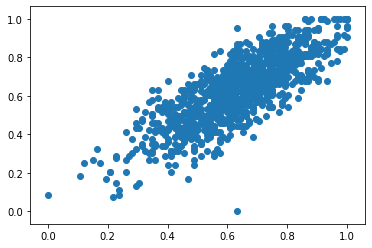

In [20]:
#Correlation between Math score and Reading score

data1=np.array([np.mean(df['Math score']), np.std(df['Math score'])]*100)  

data2=np.array([np.mean(df['Reading score']), np.std(df['Reading score'])]*100)

data3=np.array([np.mean(df['Writing score']), np.std(df['Writing score'])]*100)

plt.scatter(df['Math score'], df['Reading score'])

plt.show()


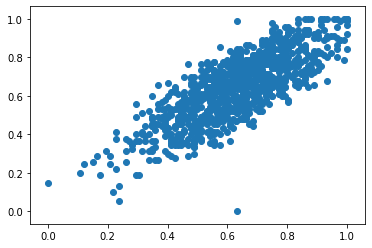

In [21]:
# correlation between math score and writing score

plt.scatter(df['Math score'], df['Writing score'])

plt.show()

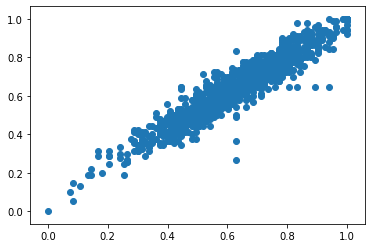

In [22]:
#correlation between reading score and writing score

plt.scatter(df['Reading score'], df['Writing score'])

plt.show()

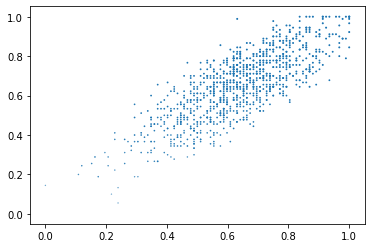

In [23]:
#correlation between all three scores

plt.scatter(df['Math score'],df['Writing score'], df['Reading score'])

plt.show()

                                   Calculation of COVARIANCE between attributes

In [24]:
a=np.cov(df['Math score'], df['Reading score'])

b= np.cov(df['Math score'], df['Writing score'])

c=np.cov(df['Reading score'], df['Writing score'])

print(a)

print(b)

print(c)

[[0.02617829 0.02257145]
 [0.02257145 0.03061634]]
[[0.02617829 0.02138117]
 [0.02138117 0.02825018]]
[[0.03061634 0.02774725]
 [0.02774725 0.02825018]]


## Various plots and charts/graphs

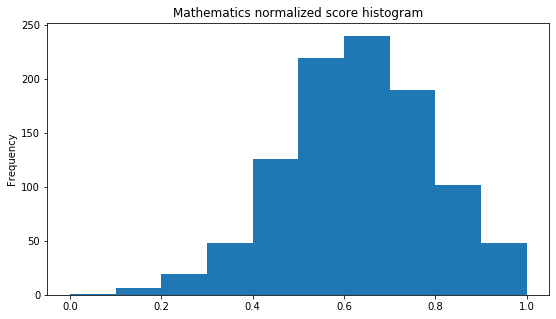

In [25]:
plt.figure(figsize=(9,5))

plt.title('Mathematics normalized score histogram')

df['Math score'].plot(kind="hist")

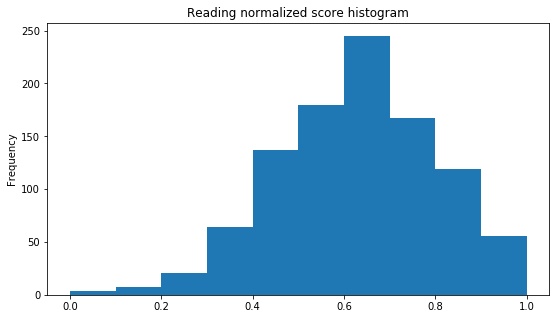

In [26]:
plt.figure(figsize=(9,5))

plt.title('Reading normalized score histogram')

df['Reading score'].plot(kind="hist")

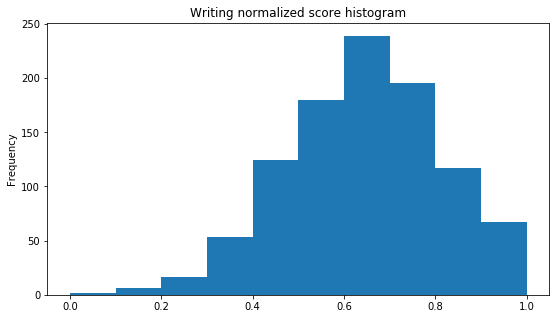

In [27]:
plt.figure(figsize=(9,5))

plt.title('Writing normalized score histogram')

df['Writing score'].plot(kind="hist")

                               CORRELATION MATRIX BETWEEN VARIOUS ATTRIBUTES

NameError: name 'corrmat' is not defined

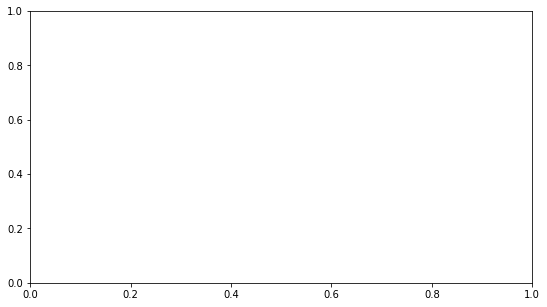

In [28]:
f, ax = plt.subplots(figsize =(9, 5)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

                                              BOXPLOT ANALYSIS

Text(0.5, 1.0, 'Mathematics score - BoxPlot')

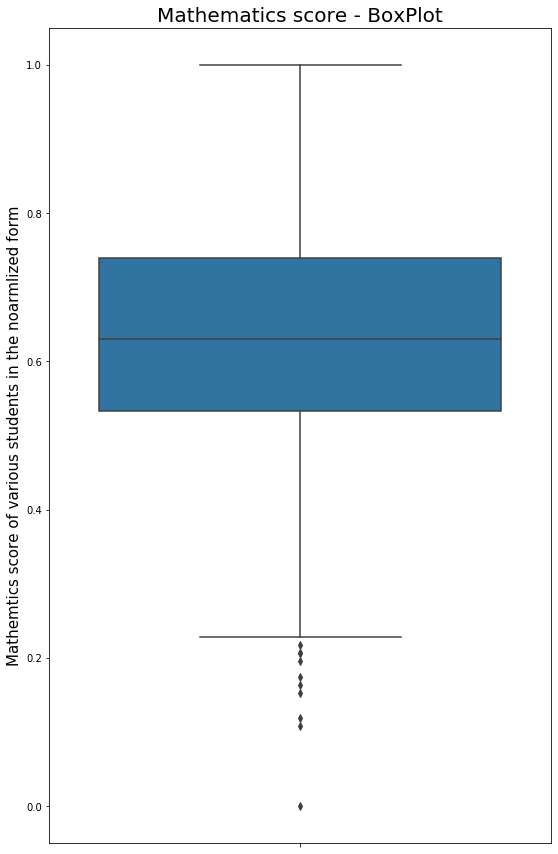

In [29]:
fig, ax1 = plt.subplots() 
fig.set_size_inches(9,  15) 
  
ax1 = sns.boxplot(x = df['Math score'], orient ="v") 
ax1.set_ylabel("Mathemtics score of various students in the noarmlized form", fontsize = 15) 
ax1.set_title("Mathematics score - BoxPlot", fontsize = 20)

Text(0.5, 1.0, 'Reading score - BoxPlot')

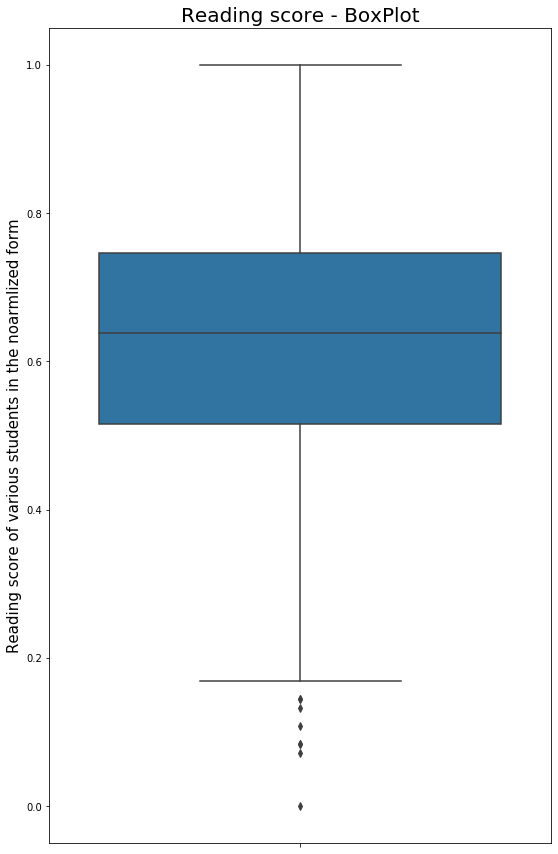

In [30]:
fig, ax2 = plt.subplots() 
fig.set_size_inches(9,  15) 
  
ax2 = sns.boxplot(x = df['Reading score'], orient ="v") 
ax2.set_ylabel("Reading score of various students in the noarmlized form", fontsize = 15) 
ax2.set_title("Reading score - BoxPlot", fontsize = 20)

Text(0.5, 1.0, 'Writing score - BoxPlot')

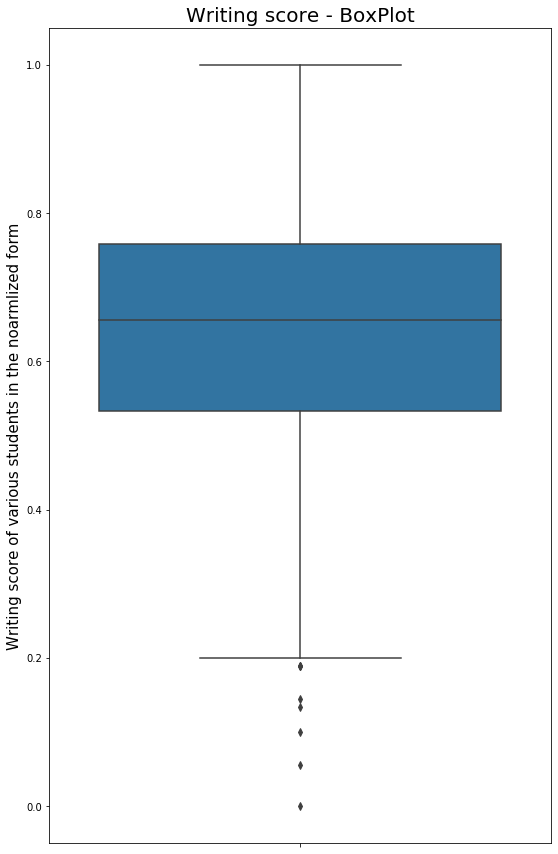

In [31]:
fig, ax3 = plt.subplots() 
fig.set_size_inches(9,  15) 
  
ax3 = sns.boxplot(x = df['Writing score'], orient ="v") 
ax3.set_ylabel("Writing score of various students in the noarmlized form", fontsize = 15) 
ax3.set_title("Writing score - BoxPlot", fontsize = 20)

In [32]:
df.head()

,Gender,Race/Ethnicity,Parental level of education,Lunch,Test preparation course,Math score,Reading score,Writing score
0,female,group B,bachelor's degree,standard,none,0.695652,0.662651,0.711111
1,female,group C,some college,standard,completed,0.663043,0.879518,0.866667
2,female,group B,master's degree,standard,none,0.891304,0.939759,0.922222
3,male,group A,associate's degree,free/reduced,none,0.423913,0.481928,0.377778
4,male,group C,some college,standard,none,0.631318,0.734940,0.722222


In [33]:
df.shape

(1000, 8)

In [39]:
records=[]
for i in range(0,1000):
    records.append([str(df.values[i,j]) for j in range(0,8)])
records
    

[['female',
  'group B',
  "bachelor's degree",
  'standard',
  'none',
  '0.6956521739130435',
  '0.6626506024096386',
  '0.7111111111111111'],
 ['female',
  'group C',
  'some college',
  'standard',
  'completed',
  '0.6630434782608695',
  '0.8795180722891566',
  '0.8666666666666667'],
 ['female',
  'group B',
  "master's degree",
  'standard',
  'none',
  '0.8913043478260869',
  '0.9397590361445783',
  '0.9222222222222223'],
 ['male',
  'group A',
  "associate's degree",
  'free/reduced',
  'none',
  '0.42391304347826086',
  '0.4819277108433735',
  '0.37777777777777777'],
 ['male',
  'group C',
  'some college',
  'standard',
  'none',
  '0.6313184870979144',
  '0.7349397590361446',
  '0.7222222222222222'],
 ['female',
  'group B',
  "associate's degree",
  'standard',
  'none',
  '0.6847826086956522',
  '0.7951807228915663',
  '0.7555555555555555'],
 ['female',
  'group B',
  'some college',
  'standard',
  'completed',
  '0.8695652173913043',
  '0.9397590361445783',
  '0.64466913

In [38]:
from apyori import apriori

In [41]:
association_rules=apriori(records, min_support=0.50, min_confidence=0.7, min_lift=1.2, min_length=2)
results=list(association_rules)

In [42]:
results

[]